Final integration comments:
- Gauss-Kronrod Quadrature - default version use by scipy.quad()
- does nested quadrature so can adapt the error level
- different quadrature methods use different polynomials to determine the location of the points
- G-K using Stieltjes polynomials

Differentiation
- derivatives of known functions can always be calculated analytically so numerical methods are less important
- basic technique for numerical differentiation is quite simple
- there are some problems with it though so good to avoid them
- two numerical problems:
    - subtracting two numbers close to each other
    - dividing by a small number
    - both of these can contribute to roundoff error
- some basic schemes:
    - forward difference
    - backward difference
    - one might be better if there is a discontinuity at x

Error calculation
- more Taylor series to estimate approximation error
- both basic difference methods are first order with second order error
- rounding error should be 2C*abs(f(x))/h
- one error is improved with smaller h and the other is made worse
- want to minimize total error, so take derivative of error expression and set to zero and solve for h
- get that h should be around 10^-8 and then the error will also be about that magnitude
- that's not very good!

Improved methods
- centered difference is a second order scheme with third order error
- now h should be 10^-5 and error will be 10^-10 which is 100x better than forward or backward difference

Sampled functions:
- where you have just some points, not the actual function
- get more accurate results if you calculate the derivatives with the centered difference method at points halfway between the actual data points

In [6]:
import math
import numpy as np

In [7]:
def f(x):
    return 1+0.5*math.tanh(2*x)

In [8]:
def sech(x):
    return 1 / math.cosh(x)

In [9]:
def fprime(x):
    return sech(2*x)**2

In [10]:
def centereddiff(f,x,h):
    fplus=f(x+h/2)
    fminus=f(x-h/2)
    return (fplus-fminus)/h

In [11]:
h=10**-5

In [12]:
Xs=np.linspace(-2,2,100)

In [13]:
Fp_est=np.zeros(Xs.size)

In [14]:
for i,x in enumerate(Xs):
    Fp_est[i]=centereddiff(f,x,h)

In [15]:
Fp_act=np.zeros(Xs.size)

In [16]:
for i,x in enumerate(Xs):
    Fp_act[i]=fprime(x)

In [17]:
import matplotlib.pyplot as plt

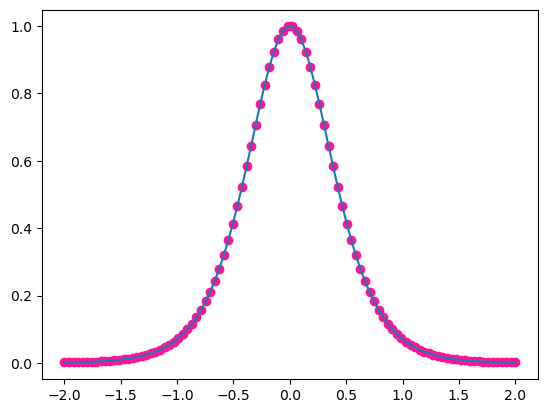

In [18]:
plt.plot(Xs,Fp_act)
plt.scatter(Xs,Fp_est,color='deeppink')
plt.show()

Higher order derivatives
- could do a fourth order fit by including more points around x and weighting them differently
- will start to get error though if there's any significant changes in the derivative around x
- see slides for formulas

Second derivatives
- just do derivative of the derivative
- formula on slides for repeated centered difference
- error does increase though
- need to use 10^-8 for h again but error stays 10^-8

Partial derivatives
- can use regular centered difference and then add/substract h/2 from either x or y depending on which variable you are using the partial of
- see slides for formulas for higher order partials
- in general though derivatives are always the same process

Noisy data
- not so good for taking derivatives because the smaller variations in the data are not actually meaningful
- could just make h larger to effectively smooth the data
    - treat the noise like rounding error and find best h
- could fit a function to the data and then take the derivative but need to be confident in your functional form choice
- could smooth the data (eg with a fourier transform)

In packages
- scipy.misc has derivative() which uses central difference
- numpy has a gradient function to calculate it along multiple axes at once

Interpolation
- what would the value of points between your points be when you don't know the function
- different than just fitting a function:
    - interpolation is filling in information in a small region of a data set
    - fitting a function attempts to model data to get a better understanding of the nature of the data
- simplest form is linear interpolation - just draw a line between the two points and put the new points on that line
    - can also work with points a little bit outside the two points but the further you go the less accurate it likely is
    - error goes like deltax^2 where deltax is the space between the two points
- also could do higher order interpolation like fitting a quadratic - requires three points though
    - can have issues where f(x) ends up outside the range of the three points used for fitting and gives nonphysical answers
- Lagrange interpolation - creates a function guaranteed to go through all the points used for fitting but it could be the wrong points
    - more points lessens the error but can get big errors right near the end of the range
    - Runge phenomena - osicllation becomes large at the end of the interval with polynomial interpolation
    - can do better with variable spacing of points
    - problem arises because the function is fit to the points, but not to their derivatives
- can fix this with something called a spline where you also try to match the derivatives of the function at the end points
    - most common one is cubic spline which matches the first and second derivative at each data point
    - fitting gets very complicated - see slides
    - good for plotting and graphing situations
- numpy and scipy methods exist for this
- to choose the best method, need think through science questions about what your data represents

Linear and nonlinear equations
- computers are great at linear algebra because it's tedious but very straightforward
- key methods:
    - gaussian elimination
    - back substitution
    - LU decomp
    - eigen vectors and eigen values
- a system of linear equations can be written as matrix multiplication Ax=v
- can solve this by inverting the matrix A to have x=A^(-1)*v
- there are more straightforward ways to do this with a computer, like gaussian elimnation
    - see slides for detailed steps
    - basically rearranging A and v so A is an upper triangle
    - then do back substitution

LU decomposition
- better than GE if you are going to solve multiple systems with the same A but different v
- basically records the steps we did for gaussian elimination
- breaking A into two triangular matrices, one upper and one lower
- numpy.linalg already has coded functions of these methods

Tridiagonal and banded matrices
- often in physics the matrices only have nonzero values near the diagonal
- tridiagonal is where only the bands on either side of the diagonal and the diagonal have nonzero values
- banded is the same idea but just different numbers of filled in diagonals
- don't want to wait time doing computations in the areas with lots of zeros 

Eigen values and vectors
- want to find a vector satisfying Av=lambda*v
- can use the QR algorithm to solve numerically
- do repeated steps to diagonalize the matrix although it takes an infinite number of steps, so set a tolerance level where it counts as close enough to zero outside the diagonal 